In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE

# Load the digits dataset
digits = load_digits()

In [2]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [3]:
print(digits["data"][0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [4]:
len(digits["data"])

1797

In [5]:
digits["data"].shape

(1797, 64)

In [6]:
np.unique(digits["target"])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

(array([178., 182., 177., 183., 181., 182., 181., 179., 174., 180.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

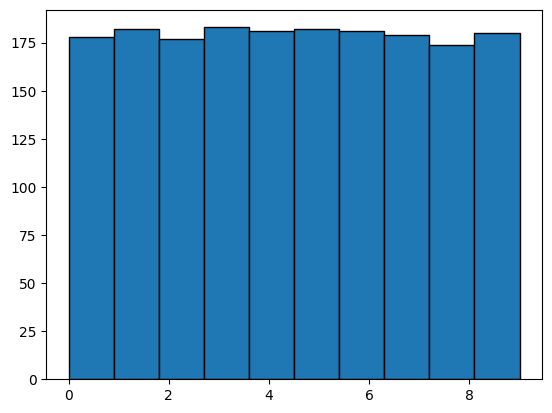

In [7]:
plt.hist(digits["target"], edgecolor="black")

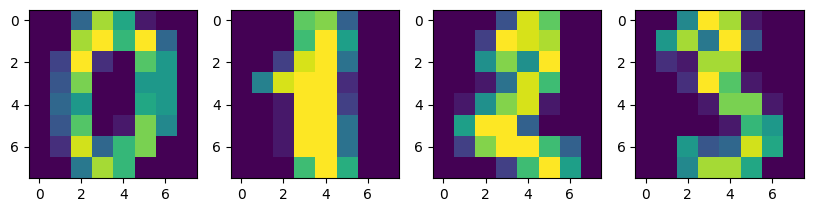

In [8]:
images = digits["data"][:4]

fig, axes = plt.subplots(nrows=1, ncols=len(images), figsize=(10, 3))

for axe, image in zip(axes, images):
    axe.imshow(image.reshape(8, 8))

In [9]:
from sklearn.model_selection import train_test_split

X = digits["data"]
y = digits["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X # Each pixel is a feature

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [11]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)

X_train = tsne.fit_transform(X_train)
X_test = tsne.fit_transform(X_test)

In [12]:
X_train # All the features are reduced to just 2 values or "dimensions"

array([[ 36.64879  ,  25.426395 ],
       [ -1.1290406,  57.982807 ],
       [  7.5821576,  51.35694  ],
       ...,
       [-26.210238 , -20.619062 ],
       [  6.537142 , -37.614483 ],
       [  5.37965  ,  -7.5224795]], dtype=float32)

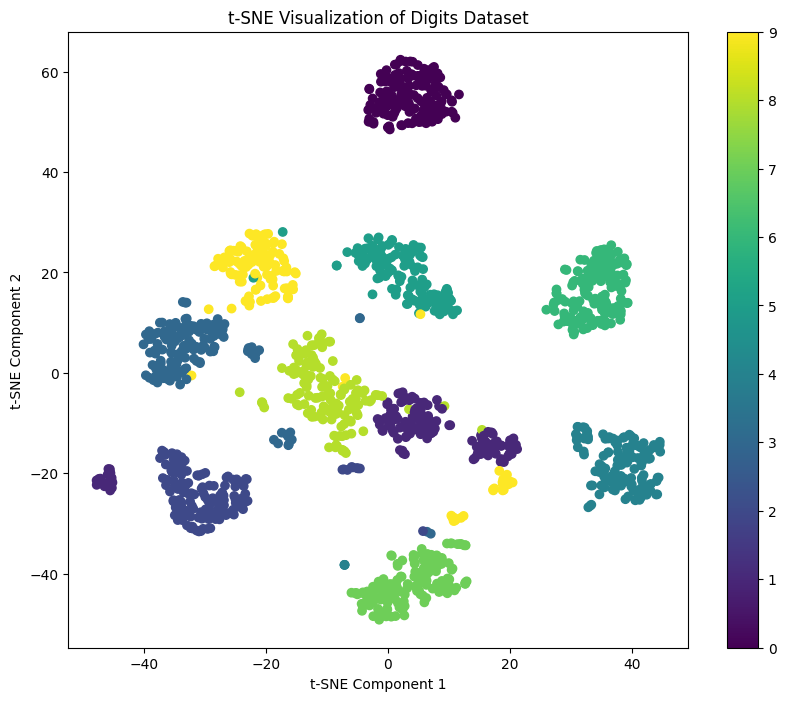

In [13]:
# Initialize t-SNE with desired parameters
tsne = TSNE(n_components=2, random_state=42)

# Visualize the embedded data
plt.figure(figsize=(10, 8))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis')
plt.colorbar()
plt.title('t-SNE Visualization of Digits Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

In [14]:
from sklearn.metrics import accuracy_score

## Predictions with Dimensionality Reduction

In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
accuracy_score(predictions, y_test)

0.125

In [16]:
# Direct
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=42)

mlp.fit(X_train, y_train)

predictions = mlp.predict(X_test)
accuracy_score(predictions, y_test)

/Users/sawzedong/Desktop/Infocomm/Event Planning/BuildingBloCS/Intro to Scikit-learn (June 24)/sklearn-final/venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.1361111111111111

# Predictions without Dimensionality Reduction

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train, y_train)

predictions = knn.predict(X_test)
accuracy_score(predictions, y_test)

0.9888888888888889

In [19]:
# Direct
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=42)

mlp.fit(X_train, y_train)

predictions = mlp.predict(X_test)
accuracy_score(predictions, y_test)

0.9833333333333333

## Conclusion

Comparing the accuracy scores, we can say that dimensionality reduction has little to no effect to the performance of our model. But we have to understand the tradeoffs.

✅ In large datasets, shrinking the number of features may save computational cost

❌ In small datasets, dimensionality reduction is excessive and incur unnecessary compuatational cost

🌟 Nonetheless, dimensionality reduction is a very useful **data visualization technique** which gives us a better idea of what the best model is.